# Create Intermediate Raster Result

In [1]:
from datetime import datetime

import geoengine as ge
from geoengine import StoredDataset
from geoengine.colorizer import Colorizer

## Initialize Geo Engine

In [2]:
ge.initialize("http://localhost:3030/api")

In [3]:
session = ge.get_session()
session

Server:              http://localhost:3030/api
Session Id:          895b9fdb-806e-444e-bf27-d6fe30c33b61

## Define workflow of MODIS NDVI raster

In [4]:
workflow = ge.register_workflow({
                "type": "Raster",
                "operator": {
                    "type": "GdalSource",
                    "params": {
                        "data": {
                            "type": "internal",
                            "datasetId": "36574dc3-560a-4b09-9d22-d5945f2b8093"
                        }
                    }
                }
            })
workflow

c7b7c5c8-ee11-5418-bd1f-9e5889f6e04a

## Query raster via WMS

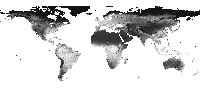

In [5]:

time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        [-180.0, -90.0, 180.0, 90.0],
        [time, time],
        resolution=(1.8, 1.8)
        ),
    Colorizer(map_name="gray", min_max=(0, 255))
)

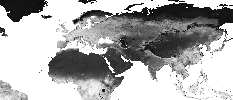

In [6]:
workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        [-60.0, -10.0, 150.0, 80.0],
        [time, time],
        resolution=(0.9, 0.9)
        ),
        Colorizer(map_name="gray", min_max=(0, 255))
)

## Store part of the world as new dataset

In [7]:
start_time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")
end_time = datetime.strptime(
    '2014-06-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")
task = workflow.save_as_dataset(
    ge.QueryRectangle(
        [-60.0, -10.0, 150.0, 80.0],
        [start_time, end_time],
        resolution=(0.9, 0.9)
        ),
    "Part NDVI",
    "Test Description",
)
task

UUID('acaa7dbe-1552-4c7d-aa96-a39244e5c244')

In [8]:
task_status_info = task.wait_for_finish(1)
task_status_info

TaskStatusInfo(status='completed', info={'dataset': '26c9c65f-b398-4518-a9da-f5629d8c4d8a', 'upload': '62637841-1a20-48d8-9bcd-2d9b9d38cd2a'}, time_total='00:00:00')

In [9]:
stored_dataset = StoredDataset.from_response(task_status_info.info)
stored_dataset

StoredDataset(dataset_id=26c9c65f-b398-4518-a9da-f5629d8c4d8a, upload_id=62637841-1a20-48d8-9bcd-2d9b9d38cd2a)

In [10]:
new_workflow = ge.register_workflow({
                "type": "Raster",
                "operator": {
                    "type": "GdalSource",
                    "params": {
                        "data": {
                            "type": "internal",
                            "datasetId": str(stored_dataset.dataset_id)
                        }
                    }
                }
            })
new_workflow

9d1e2b72-0646-59ee-a921-7d5476952df6

## WMS request from new dataset

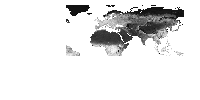

In [11]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        [-180.0, -90.0, 180.0, 90.0],
        [time, time],
        resolution=(1.8, 1.8)
        ),
    Colorizer(map_name="gray", min_max=(0, 255))
)

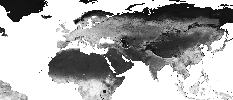

In [17]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        [-60.0, -10.0, 150.0, 80.0],
        [time, time],
        resolution=(0.9, 0.9)
        ),
    Colorizer(map_name="gray", min_max=(0, 255))
)

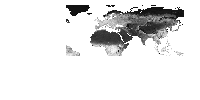

In [18]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        [-180.0, -90.0, 180.0, 90.0],
        [time, time],
        resolution=(1.8, 1.8)
        ),
    Colorizer(map_name="gray", min_max=(0, 255))
)

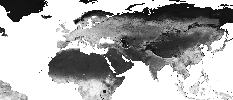

In [19]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        [-60.0, -10.0, 150.0, 80.0],
        [time, time],
        resolution=(0.9, 0.9)
        ),
    Colorizer(map_name="gray", min_max=(0, 255))
)

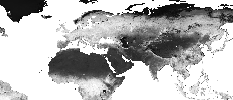

In [20]:
time = datetime.strptime(
    '2014-05-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        [-60.0, -10.0, 150.0, 80.0],
        [time, time],
        resolution=(0.9, 0.9)
        ),
    Colorizer(map_name="gray", min_max=(0, 255))
)

## Show layer for new dataset

In [21]:
root_collection = ge.layer_collection()
all_datasets_collection = next(filter(lambda item: item.name == 'Datasets', root_collection.items)).load()
all_part_ndvi_layers = list(filter(lambda item: item.name == 'Part NDVI', all_datasets_collection.items))
for layer in all_part_ndvi_layers:
    display(layer)

Layer
name: Part NDVI
description: Test Description
id: 26c9c65f-b398-4518-a9da-f5629d8c4d8a
provider id: ac50ed0d-c9a0-41f8-9ce8-35fc9e38299b

## Save layer as a new dataset

In [22]:
ge.initialize("http://localhost:3030/api", admin_token='8aca8875-425a-4ef1-8ee6-cdfc62dd7525')

In [23]:
session = ge.get_session()
session

Server:              http://localhost:3030/api
Session Id:          895b9fdb-806e-444e-bf27-d6fe30c33b61

In [24]:
layer = all_part_ndvi_layers[0].load()
layer_task = layer.save_as_dataset()
layer_task

UUID('946df439-84f8-4d5a-9fb8-4b84909d220d')

In [25]:
layer_task_status_info = layer_task.wait_for_finish(1)
layer_task_status_info

TaskStatusInfo(status='completed', info={'dataset': 'c31d9585-34eb-4033-9f3b-78ad6ac1dc6f', 'upload': 'cdde92da-a70b-45e0-9e7c-08bfa61e6329'}, time_total='00:00:00')

In [26]:
stored_layer_dataset = StoredDataset.from_response(layer_task_status_info.info)
stored_layer_dataset

StoredDataset(dataset_id=c31d9585-34eb-4033-9f3b-78ad6ac1dc6f, upload_id=cdde92da-a70b-45e0-9e7c-08bfa61e6329)

In [27]:
root_collection = ge.layer_collection()
all_datasets_collection = next(filter(lambda item: item.name == 'Datasets', root_collection.items)).load()
all_part_ndvi_layers = list(filter(lambda item: item.name == 'Part NDVI', all_datasets_collection.items))
for layer in all_part_ndvi_layers:
    display(layer)

Layer
name: Part NDVI
description: Test Description
id: 26c9c65f-b398-4518-a9da-f5629d8c4d8a
provider id: ac50ed0d-c9a0-41f8-9ce8-35fc9e38299b

Layer
name: Part NDVI
description: Test Description
id: c31d9585-34eb-4033-9f3b-78ad6ac1dc6f
provider id: ac50ed0d-c9a0-41f8-9ce8-35fc9e38299b